In [1]:
# --- Installing Libraries ---
!pip install pycaret
!pip install markupsafe==2.0.1
!pip jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 52.0 MB/s 

In [2]:
# --- Importing Libraries ---
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pycaret
import warnings
import jinja2

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
from pycaret.regression import *

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

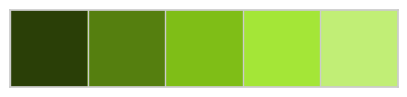

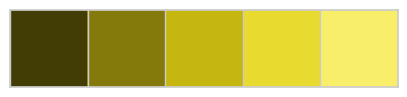

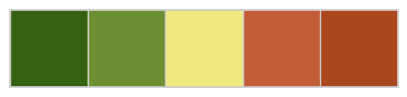

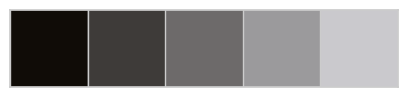

In [3]:
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# --- Reading Dataset ---
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avocado.csv')
ds.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [6]:
# --- Print Dataset Info ---
print('\033[92m\033[1m'+'.: Imported Dataset Info :.'+'\033[0m')
print('\033[92m*' * 30+'\033[0m')
print('Total Rows:'+'\033[92m\033[1m', ds.shape[0])
print('\033[0m'+'Total Columns:'+'\033[92m\033[1m', ds.shape[1])
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
print('\n')

# --- Print Dataset Detail ---
print('\033[92m\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
ds.info(memory_usage = False)

.: Imported Dataset Info :.
******************************
Total Rows: 18249
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), in

****************************************
.: Total Avocado based on each Type :.
****************************************


conventional    9126
organic         9123
Name: type, dtype: int64

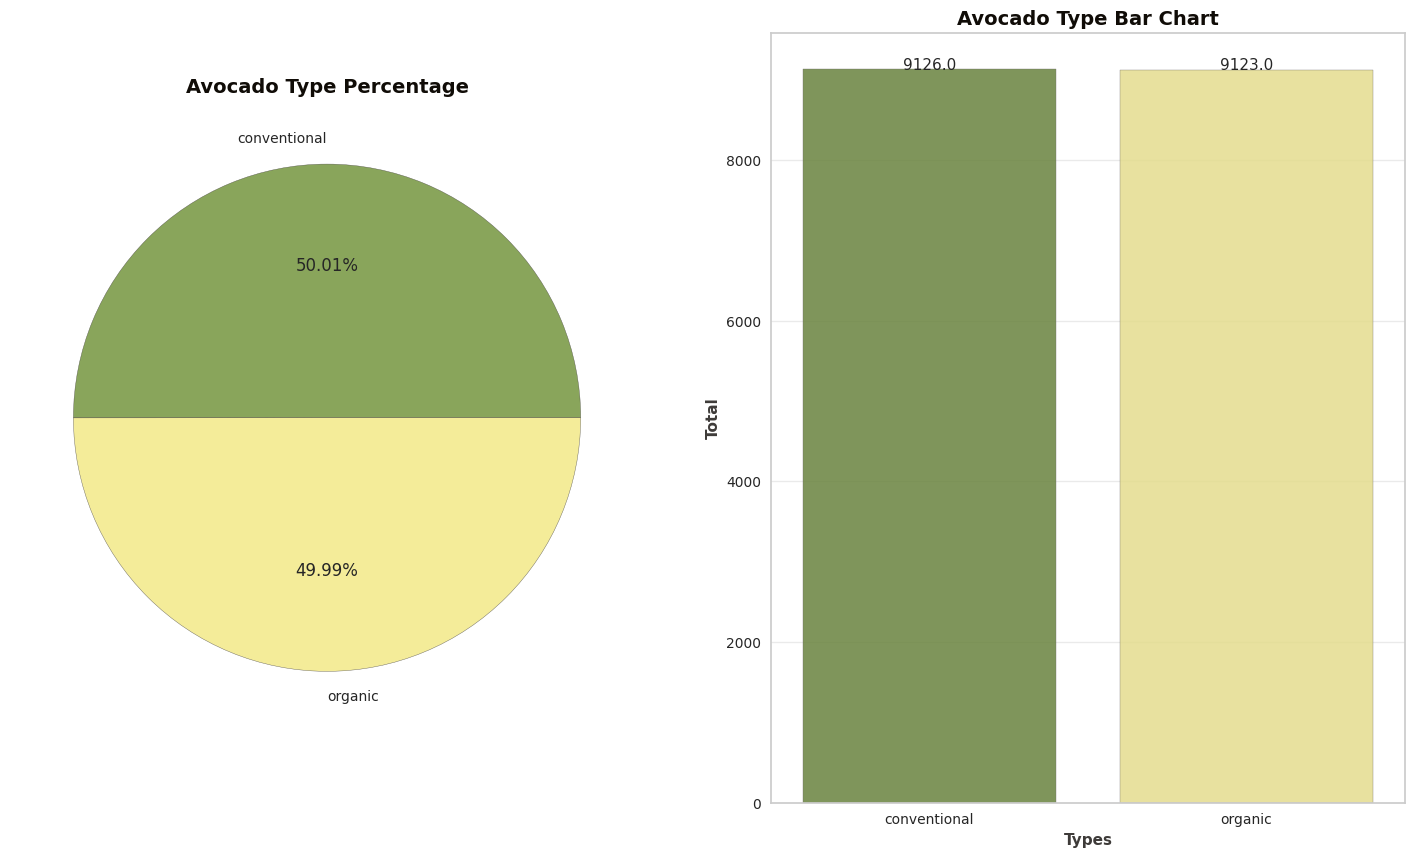

In [7]:
# --- Colors and Labels (Null Values Dropped) ---
colors = color_mix[1:3]
labels = ds['type'].dropna().unique()
order = ds['type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Avocado Type Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
          color = black_grad[0])
plt.pie(ds['type'].value_counts(), labels = order, colors = colors,
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Avocado Type Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'type', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center',
             fontsize = 11)

plt.xlabel('Types', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 40)
print('\033[92m\033[1m'+'.: Total Avocado based on each Type :.'+'\033[0m')
print('\033[92m'+'*' * 40+'\033[0m')
ds.type.value_counts(dropna=False)

***********************************
.: Total Avocado based on Year :.
***********************************


2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

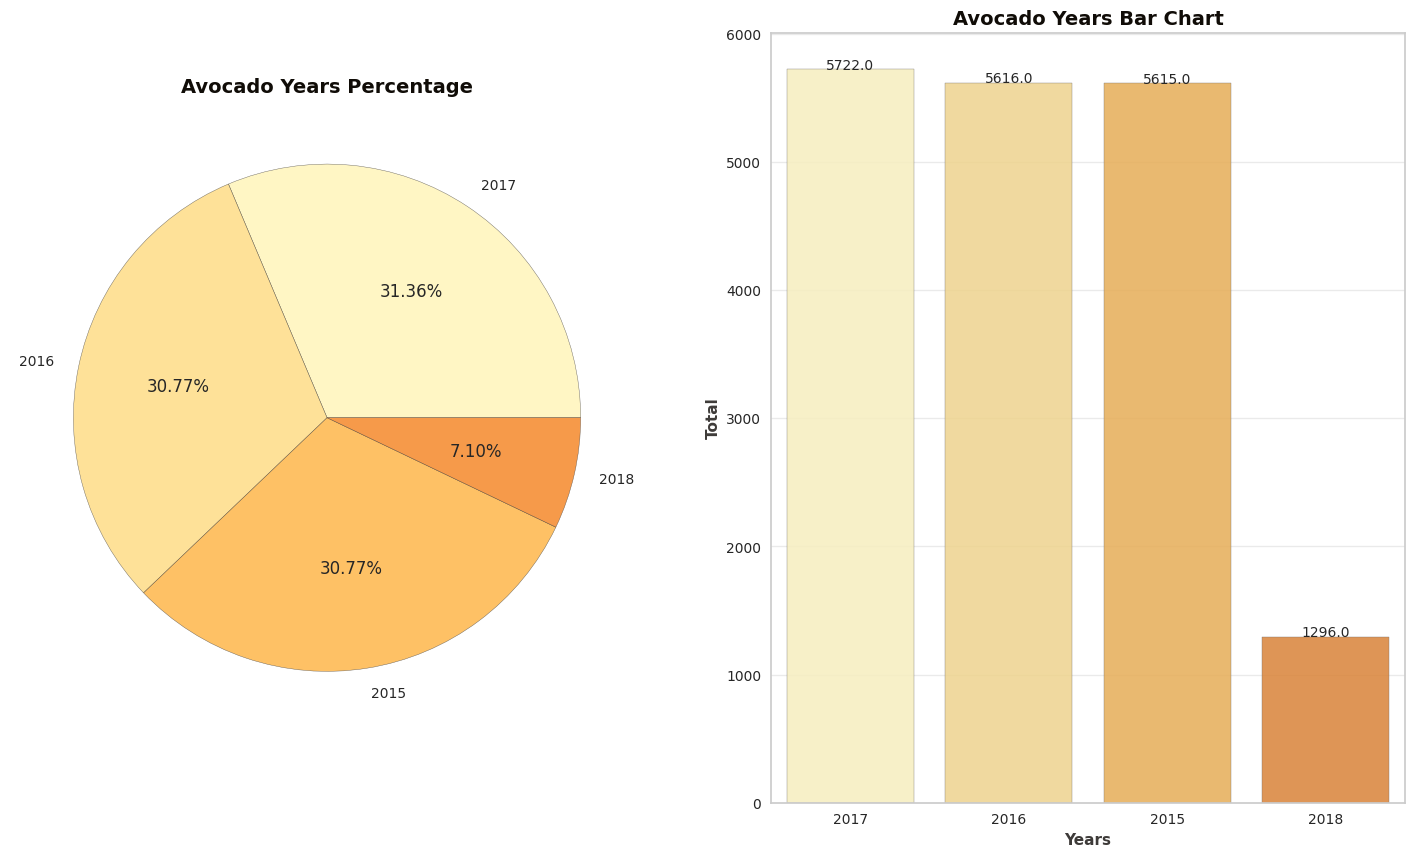

In [8]:
# --- Colors and Labels (Null Values Dropped) ---
colors = sns.color_palette('YlOrBr')
labels = ds['year'].dropna().unique()
order = ds['year'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18,10))

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Avocado Years Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['year'].value_counts(), labels = order, colors = colors,
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

# --- Bar Chart ---
countplt = plt.subplot(1,2,2)
plt.title('Avocado Years Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'year', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center',
             fontsize = 10)

plt.xlabel('Years', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 35)
print('\033[92m\033[1m'+'.: Total Avocado based on Year :.'+'\033[0m')
print('\033[92m'+'*' * 35+'\033[0m')
ds.year.value_counts(dropna=False)

In [9]:
# --- Count Categorical Labels w/Out Dropping Null Walues ---
print('\033[92m'+'*' * 38)
print('\033[92m\033[1m'+'.: Total Avocado based on Regions :.'+'\033[0m')
print('\033[92m'+'*' * 38)
ds.region.value_counts(dropna=False)

**************************************
.: Total Avocado based on Regions :.
**************************************


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

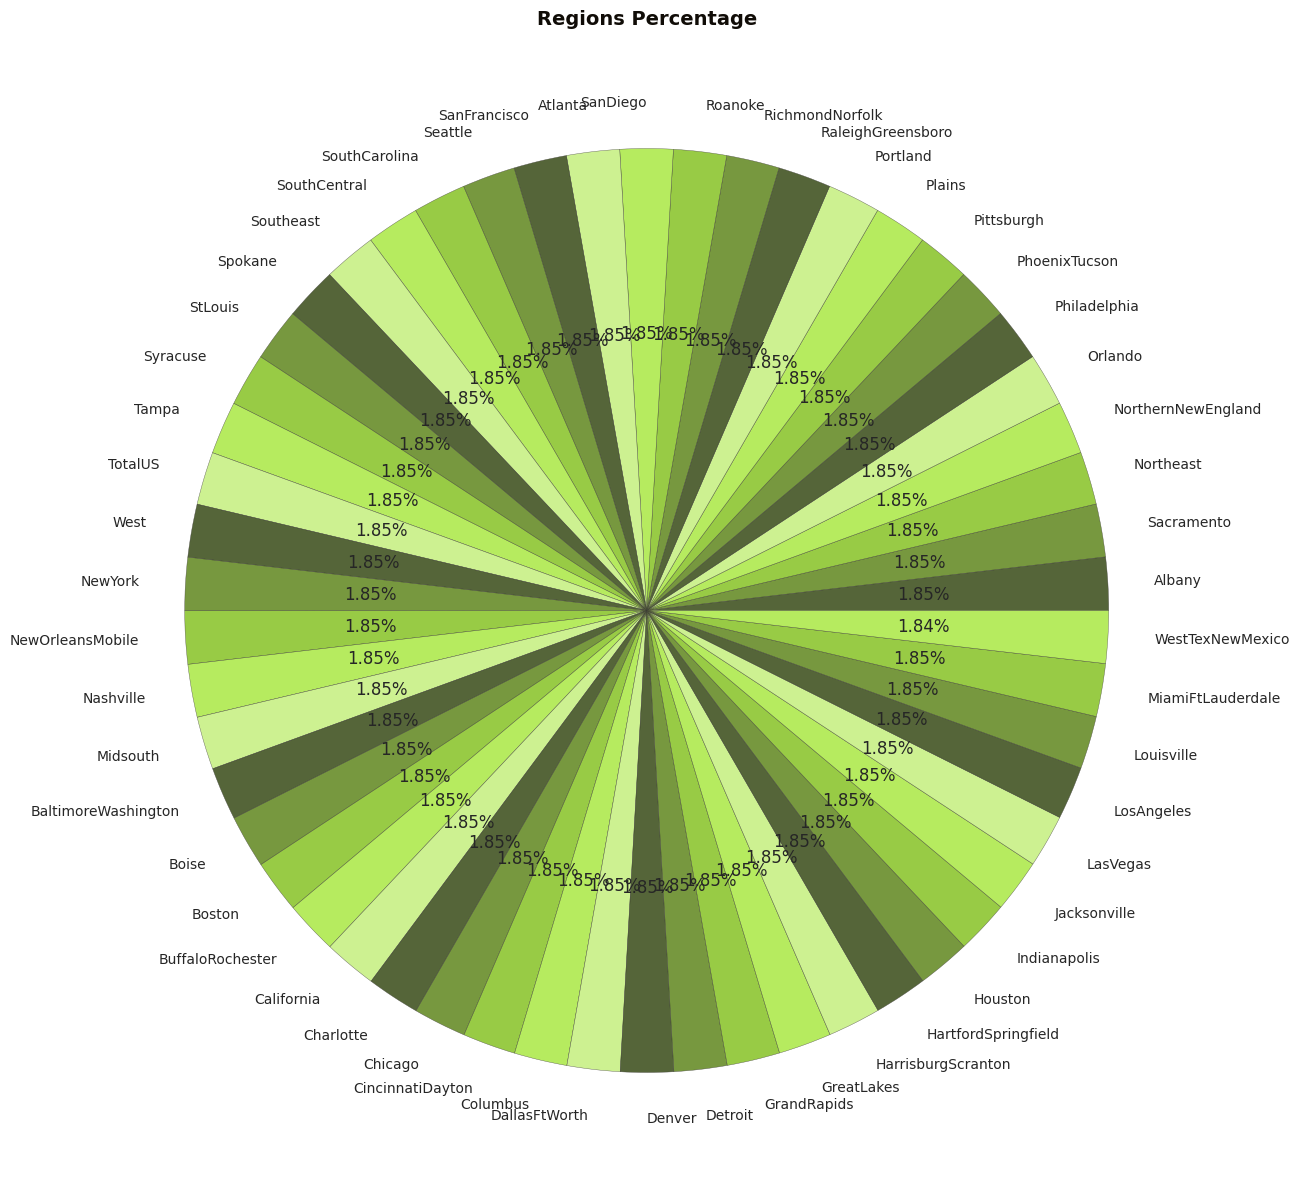

In [10]:
# --- Colors and Labels (Null Values Dropped) ---
colors = olive_grad[0:5]
labels = ds['region'].dropna().unique()
order = ds['region'].value_counts().index

# --- Pie Chart ---
plt.figure(figsize = (15, 15))
plt.title('Regions Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['region'].value_counts(), labels = order, colors = colors,
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%');

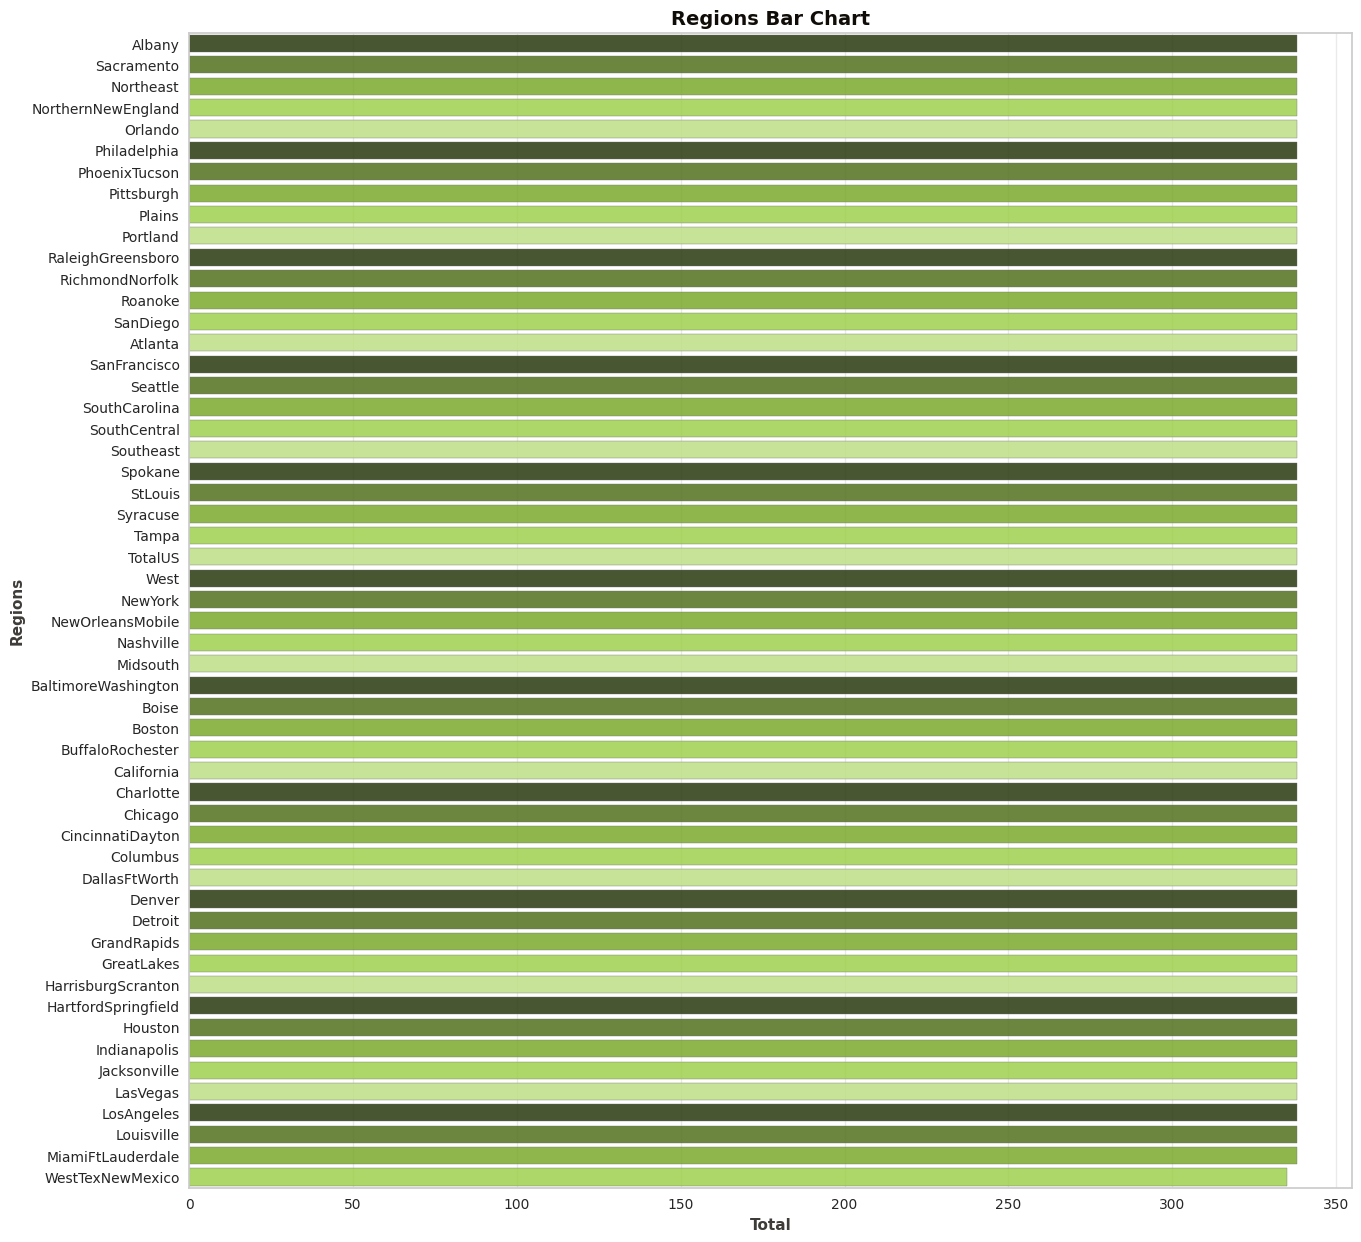

In [11]:
# --- Bar Chart ---
plt.figure(figsize = (15, 15))
plt.title('Regions Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
sns.countplot(y = 'region', data = ds, order = order, palette = colors, edgecolor = black_grad[2], alpha = 0.85)
plt.xlabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Regions', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0.4);

In [12]:
# --- Descriptive Statistics ---
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
    'XLarge Bags']].describe().T.style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.000000,1.405978,0.402677,0.440000,1.100000,1.370000,1.660000,3.250000
Total Volume,18249.000000,850644.013009,3453545.355399,84.560000,10838.580000,107376.760000,432962.290000,62505646.520000
4046,18249.000000,293008.424531,1264989.081763,0.000000,854.070000,8645.300000,111020.200000,22743616.170000
4225,18249.000000,295154.568356,1204120.401135,0.000000,3008.780000,29061.020000,150206.860000,20470572.610000
4770,18249.000000,22839.735993,107464.068435,0.000000,0.000000,184.990000,6243.420000,2546439.110000
Total Bags,18249.000000,239639.202060,986242.399216,0.000000,5088.640000,39743.830000,110783.370000,19373134.370000
Small Bags,18249.000000,182194.686696,746178.514962,0.000000,2849.420000,26362.820000,83337.670000,13384586.800000
Large Bags,18249.000000,54338.088145,243965.964547,0.000000,127.470000,2647.710000,22029.250000,5719096.610000
XLarge Bags,18249.000000,3106.426507,17692.894652,0.000000,0.000000,0.000000,132.500000,551693.650000


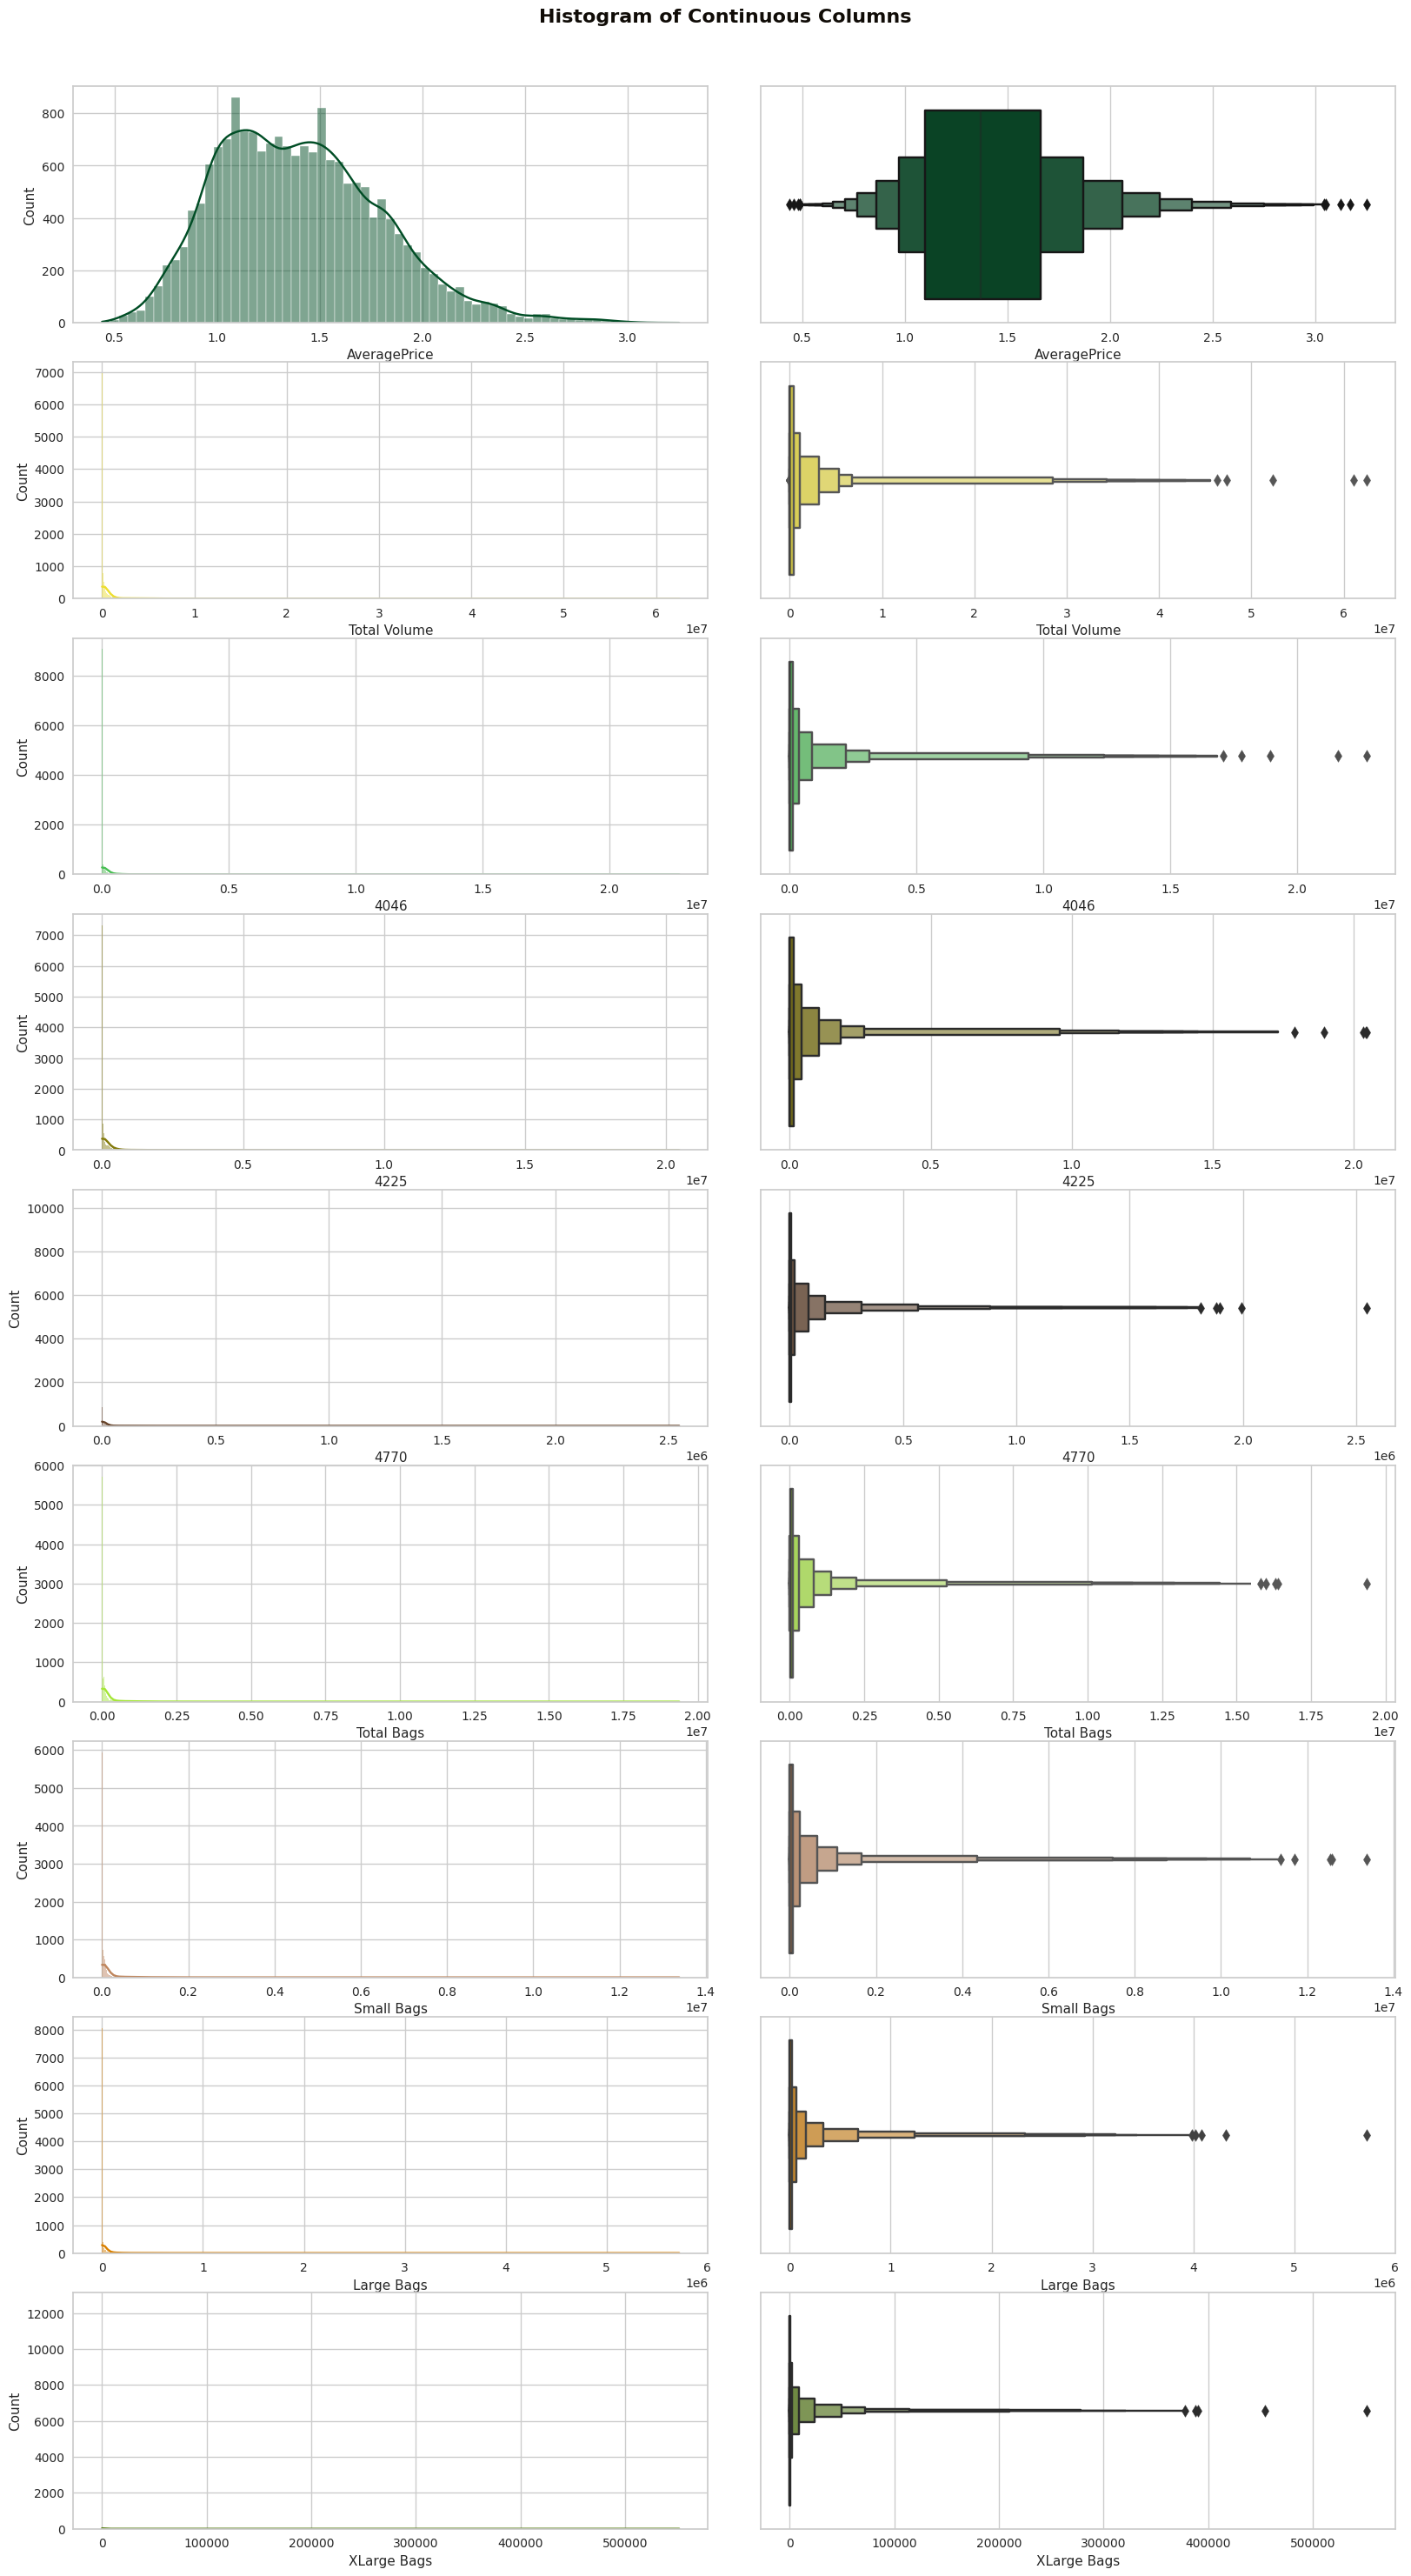

In [13]:
# --- Plot Size ---
fig, axs = plt.subplots(9, 2, figsize = (16, 30))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Histogram of Continuous Columns', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

# --- Continuous Variables (Row 1) ---
sns.histplot(data = ds, x = 'AveragePrice', kde = True, ax = axs[0, 0], color = '#004D25')
sns.boxenplot(data = ds, x = 'AveragePrice', ax = axs[0, 1], color = '#004D25')

# --- Continuous Variables (Row 2) ---
sns.histplot(data = ds, x = 'Total Volume', kde = True, ax = axs[1, 0], color = '#EDDE30')
sns.boxenplot(data = ds, x = 'Total Volume', ax = axs[1, 1], color = '#EDDE30')

# --- Continuous Variables (Row 3) ---
sns.histplot(data = ds, x='4046', kde = True, ax = axs[2, 0], color = '#48BF53')
sns.boxenplot(data = ds, x = '4046', ax = axs[2, 1], color = '#48BF53')

# --- Continuous Variables (Row 4) ---
sns.histplot(data = ds, x = '4225', kde = True, ax = axs[3, 0], color = '#837A0B')
sns.boxenplot(data = ds, x = '4225', ax = axs[3, 1], color = '#837A0B')

# --- Continuous Variables (Row 5) ---
sns.histplot(data = ds, x = '4770', kde = True, ax = axs[4, 0], color = '#664228')
sns.boxenplot(data = ds, x = '4770', ax = axs[4, 1], color = '#664228')

# --- Continuous Variables (Row 6) ---
sns.histplot(data = ds, x = 'Total Bags', kde = True, ax = axs[5, 0], color = '#A4E637')
sns.boxenplot(data = ds, x = 'Total Bags', ax = axs[5, 1], color = '#A4E637')

# --- Continuous Variables (Row 7) ---
sns.histplot(data = ds, x = 'Small Bags', kde = True, ax = axs[6, 0], color = '#BF865D')
sns.boxenplot(data = ds, x = 'Small Bags', ax = axs[6, 1], color = '#BF865D')

# --- Continuous Variables (Row 8) ---
sns.histplot(data = ds, x = 'Large Bags', kde = True, ax = axs[7, 0], color = '#D98000')
sns.boxenplot(data = ds, x = 'Large Bags', ax = axs[7, 1], color = '#D98000')

# --- Continuous Variables (Row 9) ---
sns.histplot(data = ds, x = 'XLarge Bags', kde = True, ax = axs[8, 0], color = '#557F0F')
sns.boxenplot(data = ds, x = 'XLarge Bags', ax = axs[8, 1], color = '#557F0F');

In [14]:
# --- Skewness of Continuous Variables ---
print('\033[92m\033[1m'+'.: Continuous Columns Skewness :.'+'\033[0m')
print('\033[92m*' * 34+'\033[0m')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
    'XLarge Bags']].skew(axis = 0, skipna = True)

.: Continuous Columns Skewness :.
**********************************


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [15]:
# --- Kurtoisis of Continuous Variables ---
print('\033[92m\033[1m'+'.: Continuous Columns Kurtosis :.'+'\033[0m')
print('\033[92m*' * 34+'\033[0m')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
    'XLarge Bags']].kurt(axis = 0, skipna = True)

.: Continuous Columns Kurtosis :.
**********************************


AveragePrice      0.325196
Total Volume     92.104458
4046             86.809113
4225             91.949022
4770            132.563441
Total Bags      112.272156
Small Bags      107.012885
Large Bags      117.999481
XLarge Bags     233.602612
dtype: float64

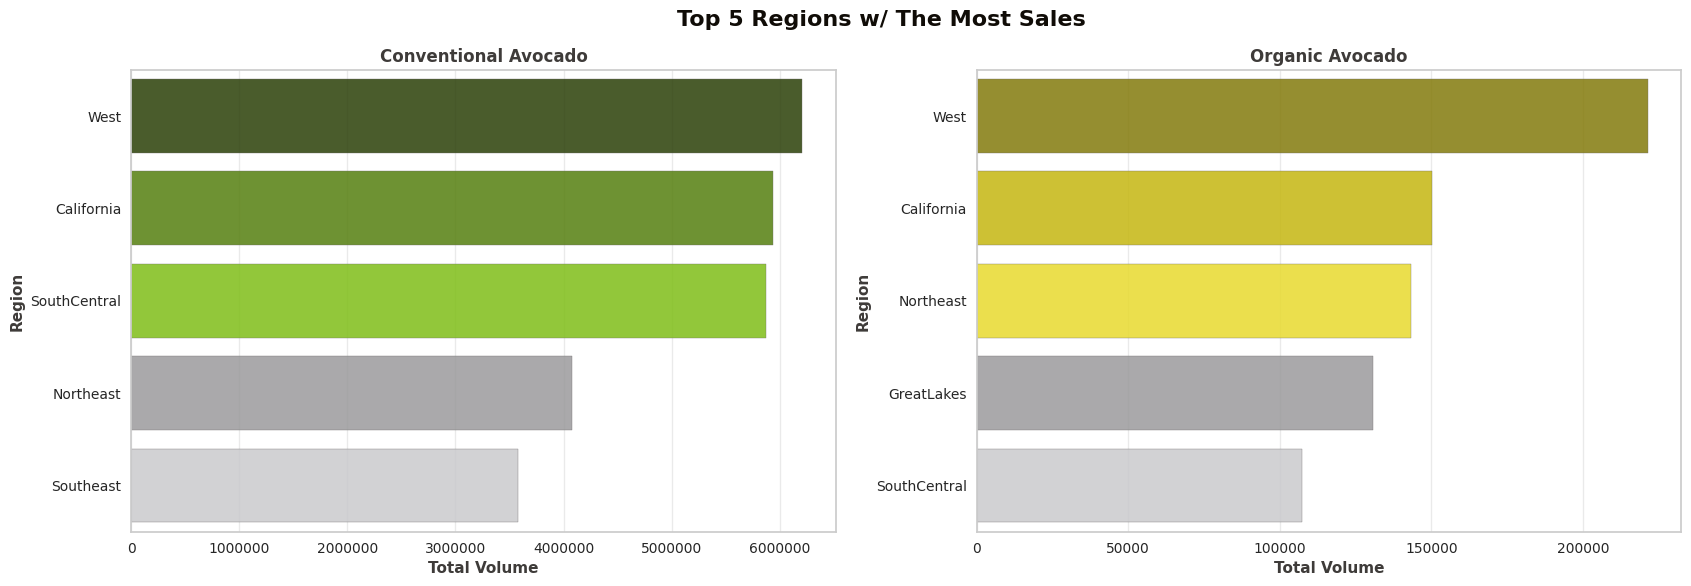

In [16]:
# --- Create New Dataframes based on Type ---
eda0 = ds.xs(['region', 'Total Volume'], axis = 1)[ds.type == 'conventional']
eda0 = eda0[eda0['region'] != 'TotalUS']
eda0 = eda0.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume',
                                                                                 ascending = False).iloc[:5]

eda1 = ds.xs(['region', 'Total Volume'], axis = 1)[ds.type == 'organic']
eda1 = eda1[eda1['region'] != 'TotalUS']
eda1 = eda1.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume',
                                                                                 ascending = False).iloc[:5]

# --- General Settings of Bar Charts ---
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ The Most Sales', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(x='Total Volume', y = eda0.index, data = eda0, palette = black_grad, edgecolor = black_grad[2],
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Total Volume', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(x='Total Volume', y = eda1.index, data = eda1, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show();

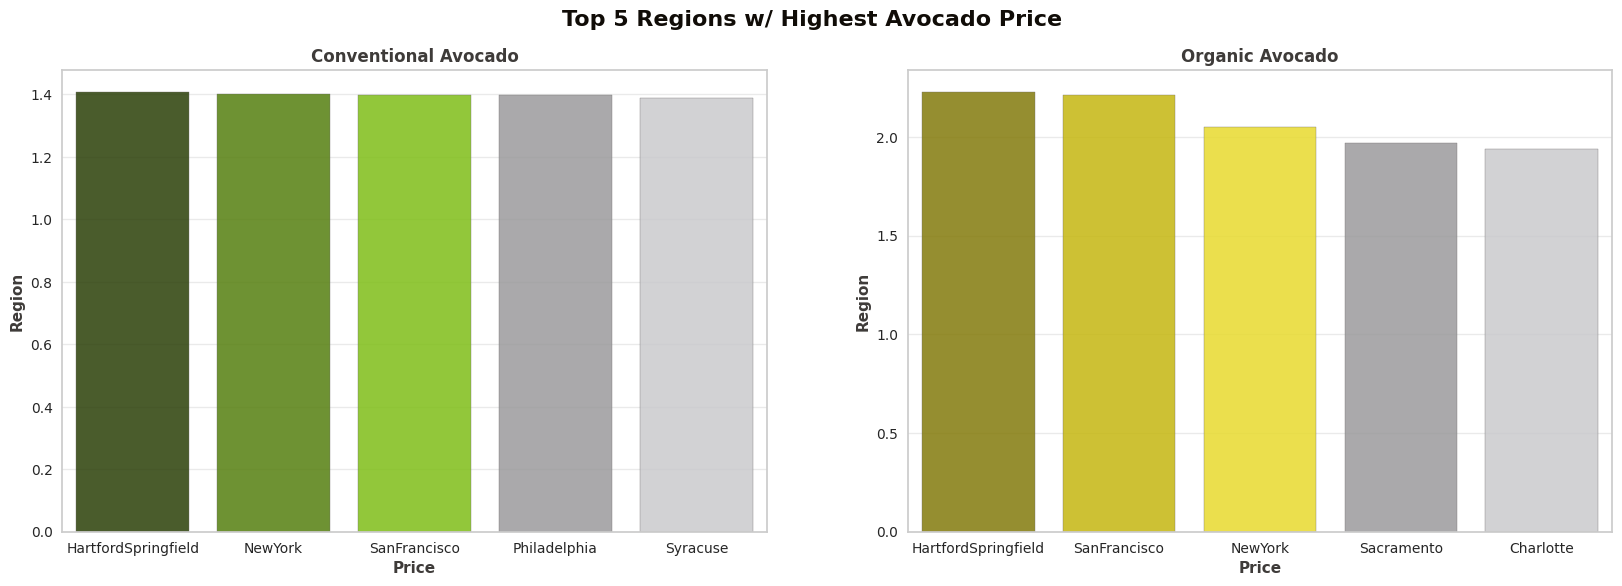

In [17]:
# --- Create New Dataframes based on Type ---
eda2 = ds.xs(['region', 'AveragePrice'], axis = 1)[ds.type == 'conventional']
eda2 = eda2.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice',
                                                                                 ascending = False).iloc[:5]

eda3 = ds.xs(['region', 'AveragePrice'], axis = 1)[ds.type == 'organic']
eda3 = eda3.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice',
                                                                                 ascending = False).iloc[:5]

# --- General Settings of Bar Charts ---
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ Highest Avocado Price', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(y = 'AveragePrice', x = eda2.index, data = eda2, palette = black_grad, edgecolor = black_grad[2],
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Price', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(y='AveragePrice', x = eda3.index, data = eda3, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Price', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show();

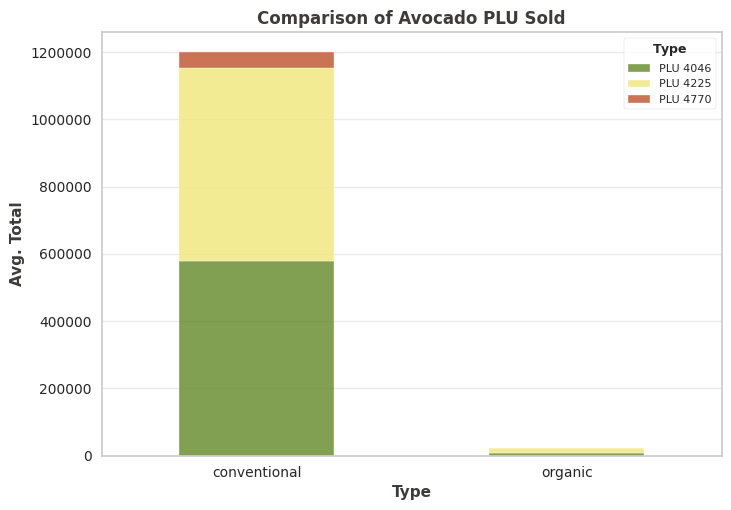

In [18]:
# --- Creating New Data Frame ---
eda30 = ds.xs(['type', '4046', '4225', '4770'], axis = 1)
eda30 = eda30.groupby(['type']).aggregate({'4046': np.mean, '4225': np.mean, '4770': np.mean})

# --- Stacked Bar Chart ---
eda30.plot(kind='bar', stacked = True, color = color_mix[-4:-1], alpha = 0.85)
plt.title('Comparison of Avocado PLU Sold', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif',
          color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['PLU 4046','PLU 4225', 'PLU 4770'], title = '$\\bf{Type}$', fontsize = '8', title_fontsize = '9',
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y');

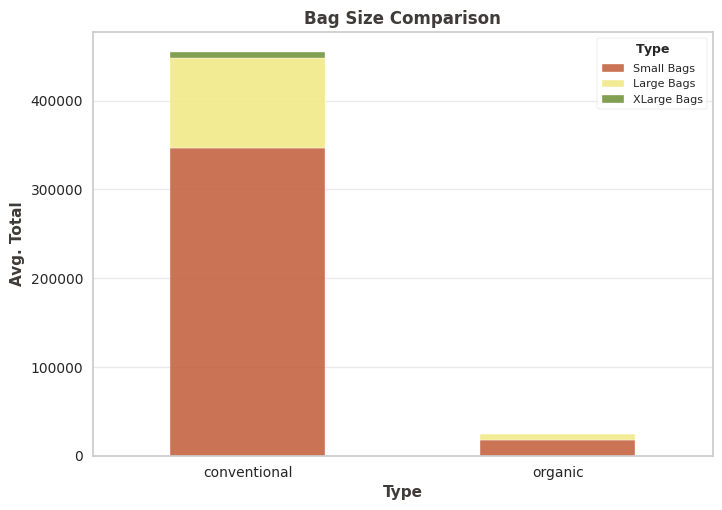

In [19]:
# --- Creating New Data Frame ---
eda31 = ds.xs(['type', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis = 1)
eda31 = eda31.groupby(['type']).aggregate({'Small Bags': np.mean, 'Large Bags': np.mean, 'XLarge Bags': np.mean})

# --- Stacked Bar Chart ---
eda31.plot(kind = 'bar', stacked = True, color = color_mix[3:0:-1], alpha = 0.85)
plt.title('Bag Size Comparison', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Small Bags','Large Bags', 'XLarge Bags'], title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9,
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y');

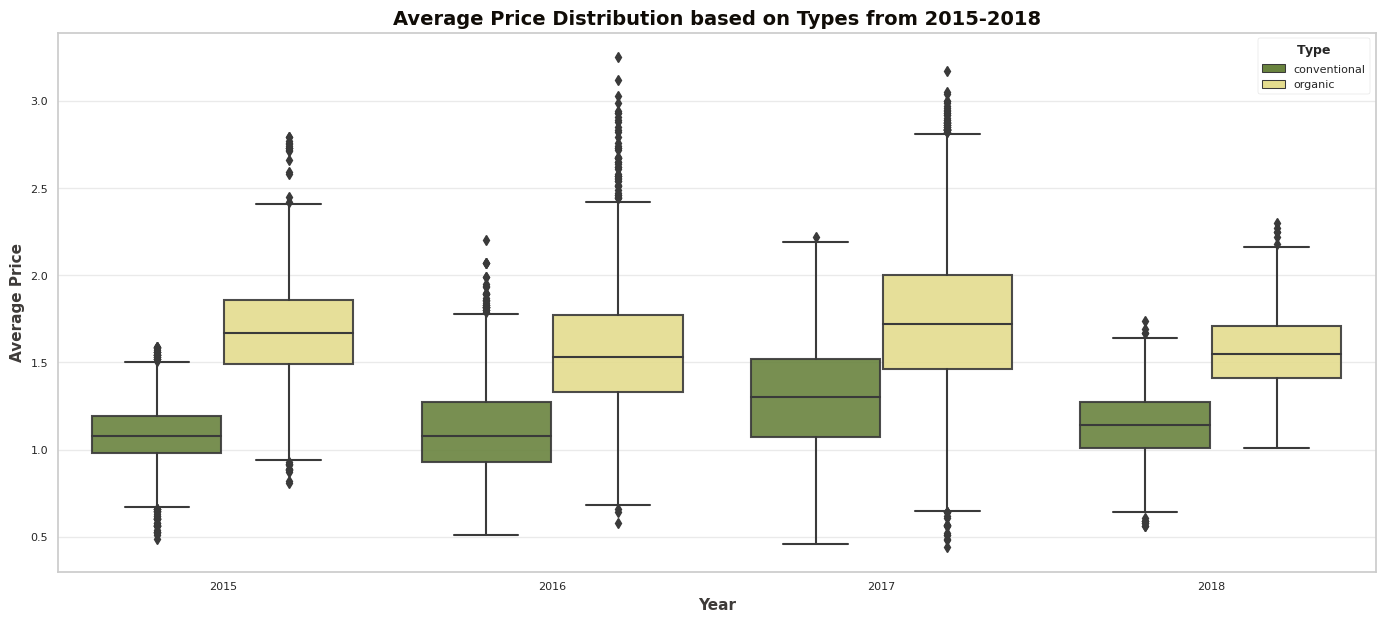

In [20]:
# --- Creating Box Plot based on Type ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
sns.boxplot(x = 'year', y = 'AveragePrice', hue = 'type', data = ds, ax = ax, palette = color_mix[1:3],
            boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()

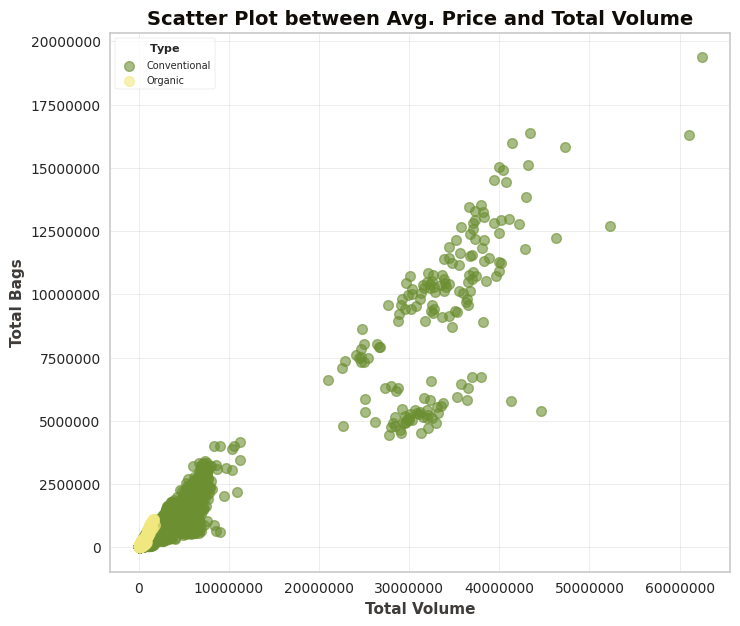

In [21]:
# --- Seperating Total Volume & Total Bags based on Type ---
x0 = ds.xs('Total Volume', axis = 1)[ds.type == 'conventional']
x1 = ds.xs('Total Volume', axis = 1)[ds.type == 'organic']
y0 = ds.xs('Total Bags', axis = 1)[ds.type == 'conventional']
y1 = ds.xs('Total Bags', axis = 1)[ds.type == 'organic']

# --- Creating Scatter Plot ---
plt.figure(figsize = (8, 7))
plt.title('Scatter Plot between Avg. Price and Total Volume', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
plt.scatter(x = x0, y = y0, c = color_mix[1], alpha = 0.6, linewidths = 1)
plt.scatter(x = x1, y = y1, c = color_mix[2], alpha = 0.6, linewidths = 1)
plt.legend(['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, loc = 'upper left',
           frameon = True)
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total Bags', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ticklabel_format(style = 'plain', axis = 'both')
plt.grid(axis = 'both', alpha = 0.5, lw = 0.5)
plt.show()

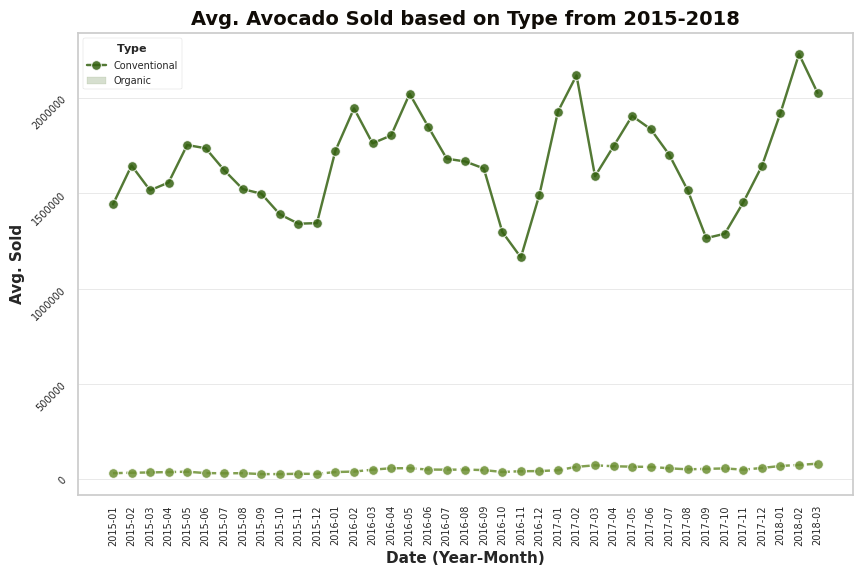

In [22]:
# --- Calculating Mean of `Total Volume` grouped by Type and Date ---
dseda8 = ds[['Date', 'Total Volume', 'type']]
dseda8['Date'] = pd.DatetimeIndex(dseda8['Date'])
dseda8['Date'] = dseda8['Date'].apply(lambda x: x.strftime('%Y-%m'))
group8 = dseda8.groupby(['Date', 'type'])
mnth_avg8 = group8.aggregate({'Total Volume': np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (10, 6))
plt.title('Avg. Avocado Sold based on Type from 2015-2018', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
sns.lineplot(data = mnth_avg8, x = 'Date', y = 'Total Volume', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = color_mix[0:2], alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Avg. Sold', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(rotation = 45, fontsize = 7)
plt.grid(axis='y', alpha = 0.5, lw = 0.6)
plt.grid(axis='x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, frameon=True);

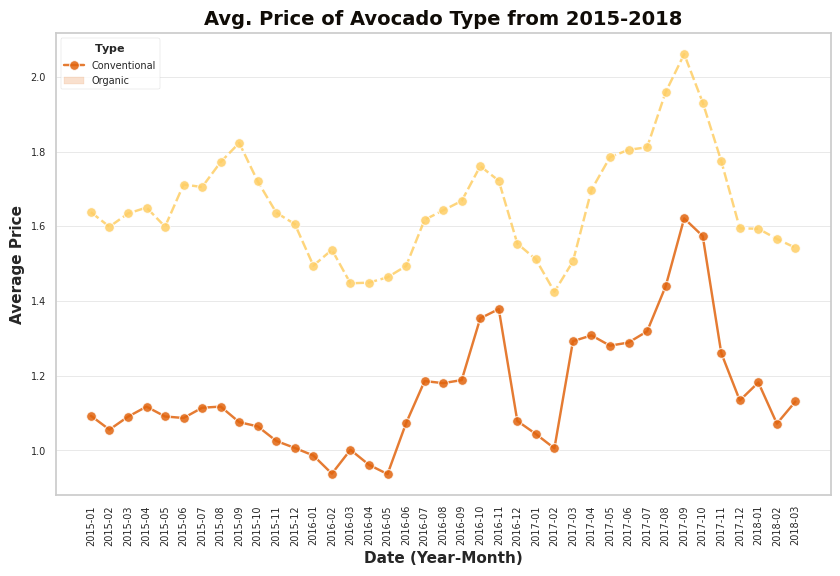

In [23]:
# --- Calculating Mean of `AveragePrice` grouped by Type and Date ---
dseda9 = ds[['Date', 'AveragePrice', 'type']]
dseda9['Date'] = pd.DatetimeIndex(dseda9['Date'])
dseda9['Date'] = dseda9['Date'].apply(lambda x: x.strftime('%Y-%m'))
group9 = dseda9.groupby(['Date', 'type'])
mnth_avg9 = group9.aggregate({'AveragePrice': np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (10, 6))
plt.title('Avg. Price of Avocado Type from 2015-2018', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
          color = black_grad[0])
sns.lineplot(data = mnth_avg9, x = 'Date', y = 'AveragePrice', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = 'YlOrBr_r', alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(axis = 'y', alpha = 0.5, lw = 0.6)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8,
           loc = 'upper left', frameon = True);

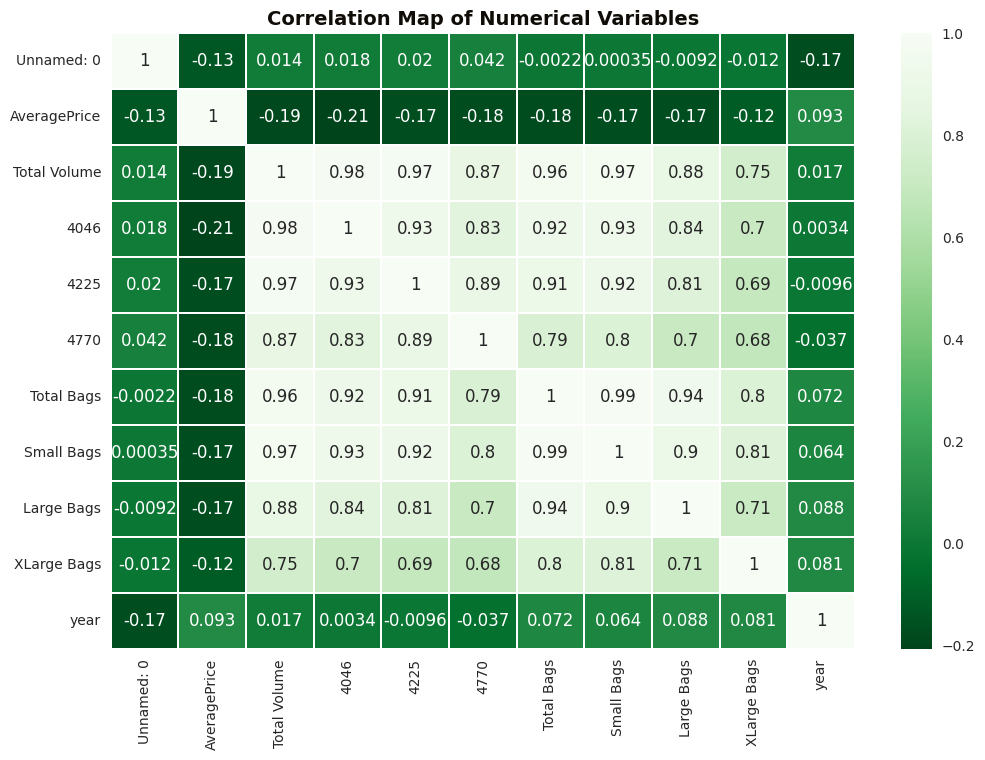

In [24]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize = (12, 8))
sns.heatmap(ds.corr(), annot = True, cmap = 'Greens_r', linewidths = 0.1)
plt.title('Correlation Map of Numerical Variables', fontsize = 14, fontweight = 'bold', fontfamily = 'sans-serif',
          color = black_grad[0]);


In [25]:
# --- Change `Date` Format to 'datetime' ---
ds.Date = pd.to_datetime(ds.Date)

# --- Extracting Month Number from `Date`  ---
ds['month'] = pd.DatetimeIndex(ds['Date']).month

In [26]:
# --- Setup PyCaret Regression Module ---
avc = setup(data = ds, target = 'AveragePrice', train_size = 0.8,
            categorical_features = ['type', 'year', 'region', 'month'], normalize = True, normalize_method = 'robust',
             session_id = 123) # silent = True, ignore_low_variance = True, 제외

,Description,Value
0,Session id,123
1,Target,AveragePrice
2,Target type,Regression
3,Original data shape,"(18249, 15)"
4,Transformed data shape,"(18249, 31)"
5,Transformed train set shape,"(14599, 31)"
6,Transformed test set shape,"(3650, 31)"
7,Ordinal features,1
8,Numeric features,9
9,Date features,1


In [27]:
# --- List PyCaret Regression Models ---
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [28]:
# --- Comparing All Models ---
best_models = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0739,0.0117,0.1081,0.9278,0.0434,0.0545,6.2100
rf,Random Forest Regressor,0.0801,0.0132,0.1146,0.9187,0.0460,0.0592,12.9970
xgboost,Extreme Gradient Boosting,0.0843,0.0135,0.1159,0.9168,0.0463,0.0615,0.6450
lightgbm,Light Gradient Boosting Machine,0.0986,0.0174,0.1320,0.8922,0.0535,0.0731,3.3970
dt,Decision Tree Regressor,0.1115,0.0284,0.1685,0.8241,0.0673,0.0813,0.5980
gbr,Gradient Boosting Regressor,0.1380,0.0341,0.1846,0.7894,0.0740,0.1024,4.9220
knn,K Neighbors Regressor,0.1563,0.0466,0.2158,0.7122,0.0862,0.1153,0.3330
ada,AdaBoost Regressor,0.1825,0.0523,0.2285,0.6771,0.0949,0.1443,2.2750
br,Bayesian Ridge,0.1823,0.0583,0.2413,0.6401,0.0975,0.1373,0.2450
ridge,Ridge Regression,0.1823,0.0583,0.2413,0.6401,0.0975,0.1373,0.2330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

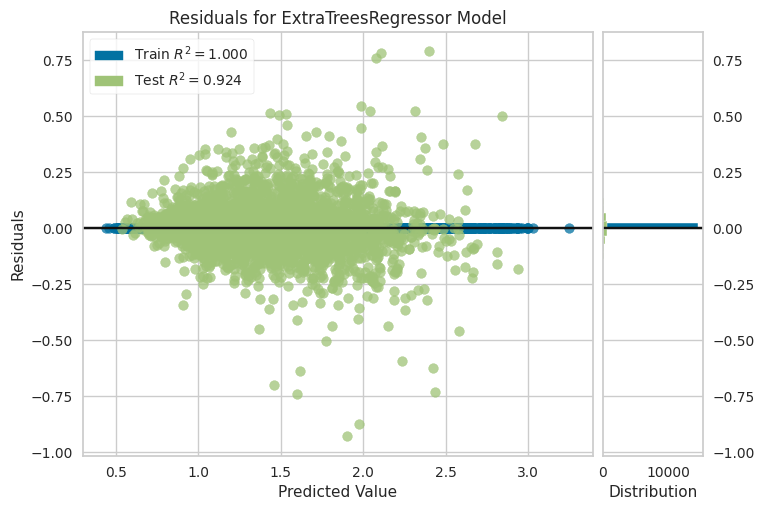

In [29]:
# --- Plot the Residual of Best Model (et) ---
plot_model(best_models)

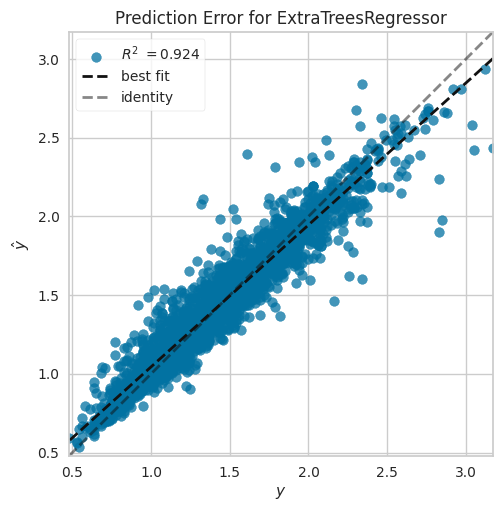

In [30]:
# --- Plot Error Prediction for Best Model ---
plot_model(best_models, plot = 'error')

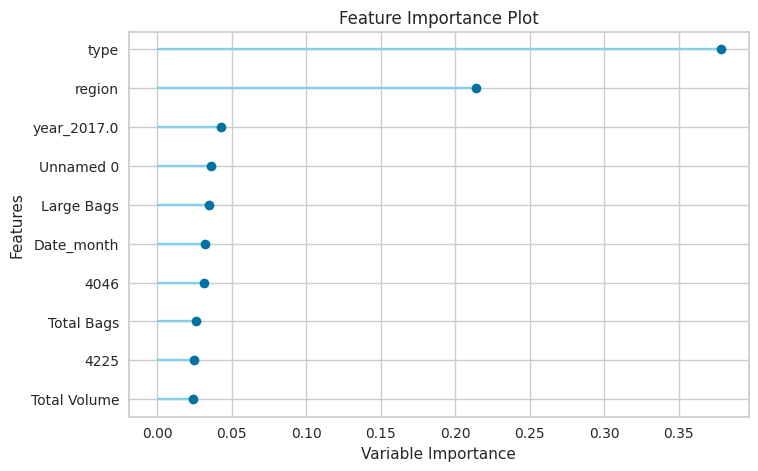

In [31]:
# --- Plot Feature Importance for Best Model ---
plot_model(best_models, plot = 'feature')

In [32]:
# --- Tuning Best Model ---
tuned_best = tune_model(best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1933,0.0671,0.2590,0.5994,0.1029,0.1462
1,0.2001,0.0687,0.2621,0.6020,0.1049,0.1511
2,0.1885,0.0597,0.2443,0.6041,0.1021,0.1504
3,0.1917,0.0660,0.2568,0.5991,0.1034,0.1473
4,0.1955,0.0653,0.2555,0.6013,0.1032,0.1499
5,0.1875,0.0606,0.2463,0.5996,0.1015,0.1479
6,0.1940,0.0650,0.2549,0.5947,0.1046,0.1525
7,0.1977,0.0733,0.2708,0.5678,0.1069,0.1474
8,0.1967,0.0677,0.2602,0.5709,0.1064,0.1534


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


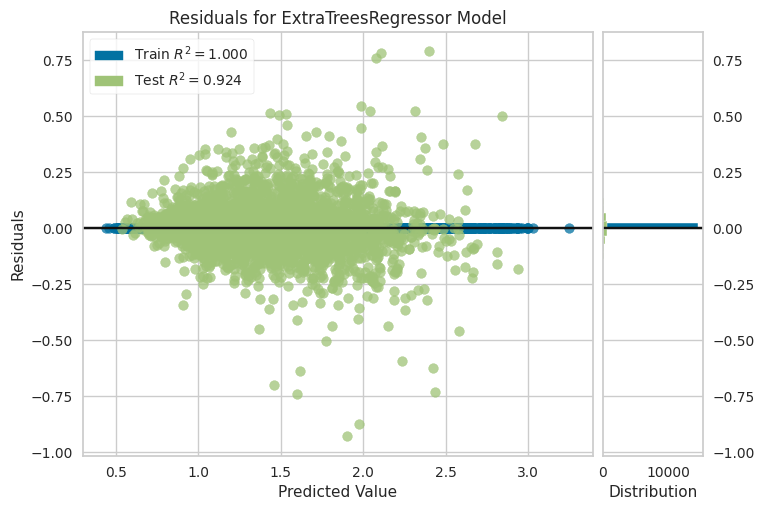

In [33]:
# --- Plot the Residual of Tuned Best Model ---
plot_model(tuned_best)

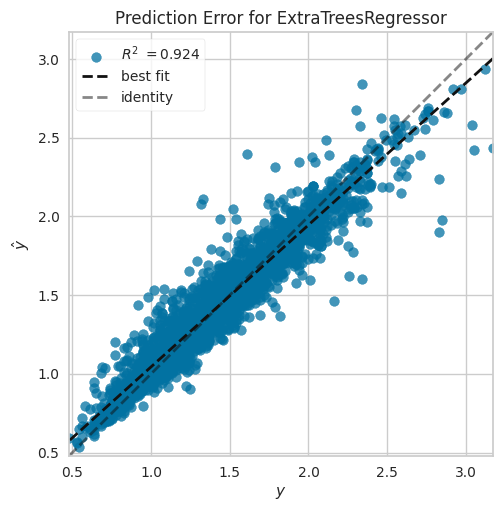

In [34]:
# --- Plot Error Prediction for Tuned Best Model ---
plot_model(tuned_best, plot = 'error')

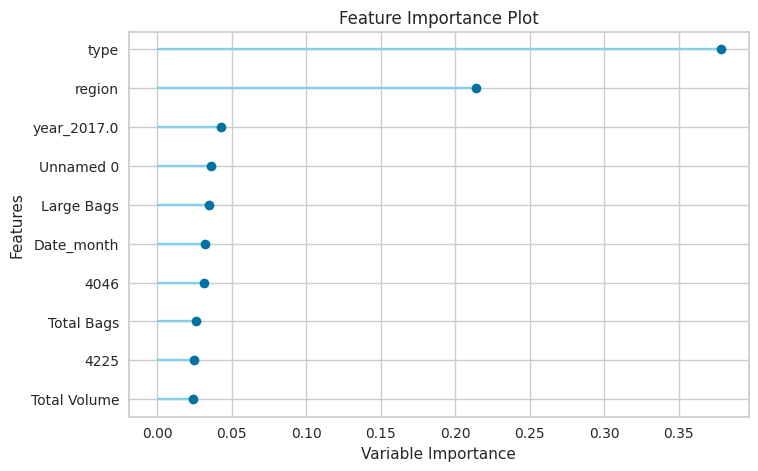

In [35]:
# --- Plot Feature Importance for Tuned Best Model ---
plot_model(tuned_best, plot = 'feature')

In [36]:
# --- Create RFR Model ---
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0813,0.0140,0.1183,0.9164,0.0466,0.0591
1,0.0800,0.0120,0.1096,0.9304,0.0446,0.0587
2,0.0791,0.0127,0.1129,0.9155,0.0461,0.0594
3,0.0791,0.0135,0.1161,0.9180,0.0459,0.0578
4,0.0766,0.0114,0.1066,0.9306,0.0426,0.0563
5,0.0765,0.0123,0.1107,0.9191,0.0448,0.0571
6,0.0802,0.0137,0.1173,0.9142,0.0467,0.0589
7,0.0835,0.0147,0.1213,0.9133,0.0478,0.0608
8,0.0835,0.0137,0.1171,0.9131,0.0477,0.0624


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

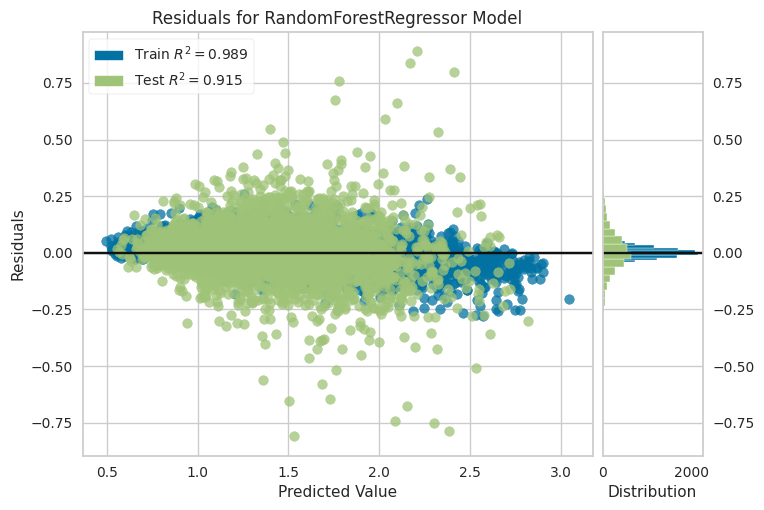

In [37]:
# --- Plot the Residual of RFR Model ---
plot_model(rf)

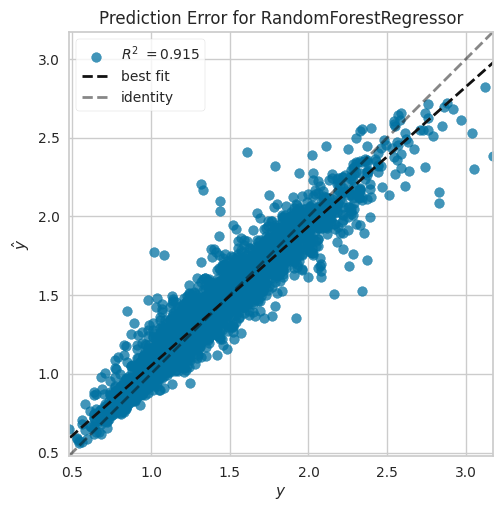

In [38]:
# --- Plot Error Prediction for RFR Model ---
plot_model(rf, plot = 'error')

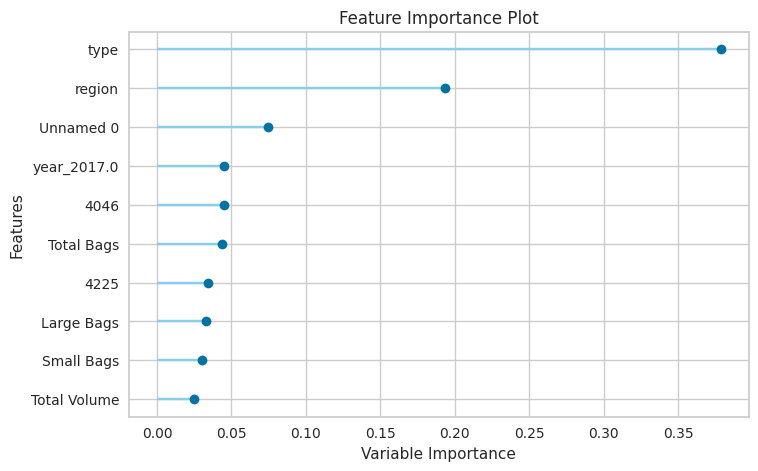

In [39]:
# --- Plot Feature Importance for RFR Model --
plot_model(rf, plot = 'feature')

In [40]:
# --- Tuning RFR Model ---
tune_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1527,0.0429,0.2072,0.7436,0.0817,0.1129
1,0.1584,0.0428,0.2070,0.7519,0.0826,0.1175
2,0.1531,0.0390,0.1975,0.7413,0.0818,0.1186
3,0.1472,0.0395,0.1987,0.7600,0.0792,0.1102
4,0.1540,0.0403,0.2007,0.7539,0.0806,0.1157
5,0.1529,0.0402,0.2005,0.7347,0.0816,0.1166
6,0.1575,0.0435,0.2086,0.7285,0.0847,0.1203
7,0.1590,0.0478,0.2186,0.7185,0.0855,0.1158
8,0.1609,0.0444,0.2108,0.7183,0.0856,0.1222


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


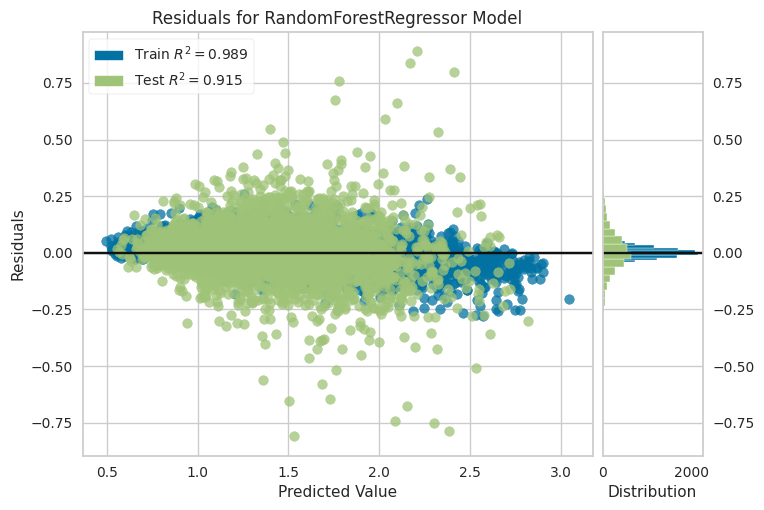

In [41]:
# --- Plot the Residual of RFR Model ---
plot_model(tune_rf)

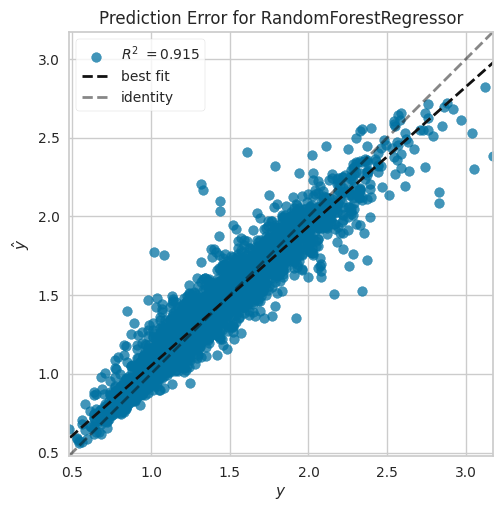

In [42]:
# --- Plot Error Prediction for Tuned RFR Model ---
plot_model(tune_rf, plot = 'error')

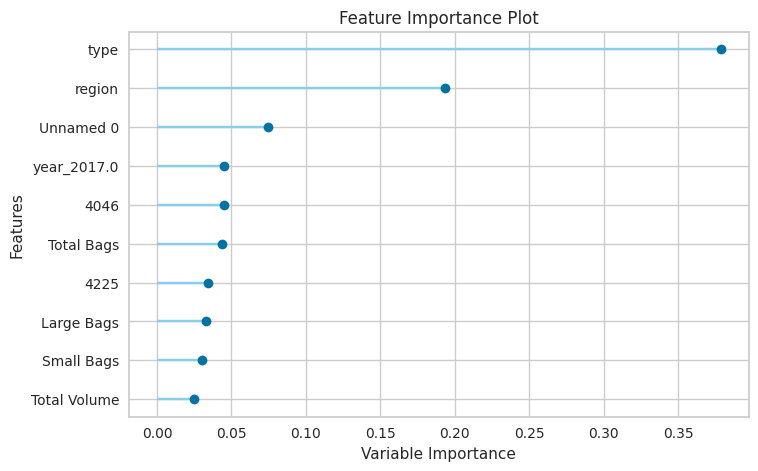

In [43]:
# --- Plot Feature Importance for Tuned RFR Model ---
plot_model(tune_rf, plot = 'feature')

In [44]:
# --- Create Light GBM ---
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0988,0.0176,0.1327,0.8948,0.0528,0.0719
1,0.1005,0.0172,0.1310,0.9005,0.0531,0.0740
2,0.0990,0.0171,0.1309,0.8864,0.0542,0.0751
3,0.0943,0.0166,0.1287,0.8993,0.0516,0.0693
4,0.0936,0.0151,0.1229,0.9078,0.0495,0.0690
5,0.0966,0.0166,0.1289,0.8903,0.0526,0.0720
6,0.0989,0.0181,0.1345,0.8872,0.0541,0.0732
7,0.1024,0.0196,0.1399,0.8846,0.0557,0.0746
8,0.0994,0.0173,0.1315,0.8903,0.0541,0.0747


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

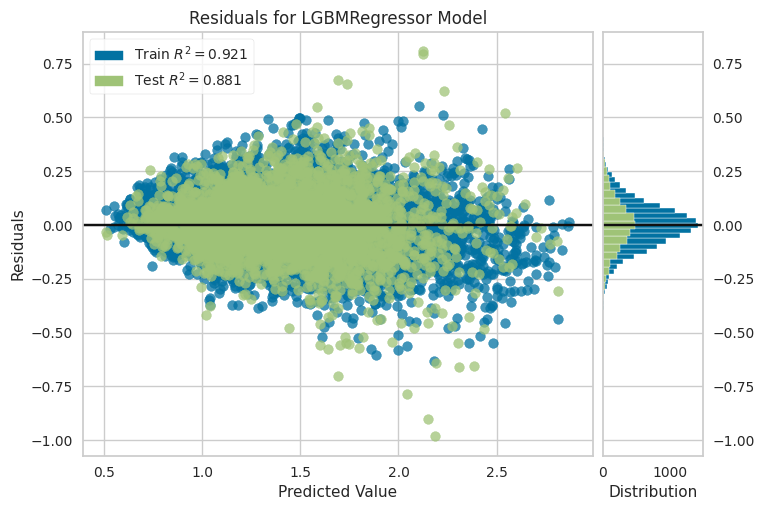

In [45]:
# --- Plot the Residual of Light GBM ---
plot_model(lgbm)

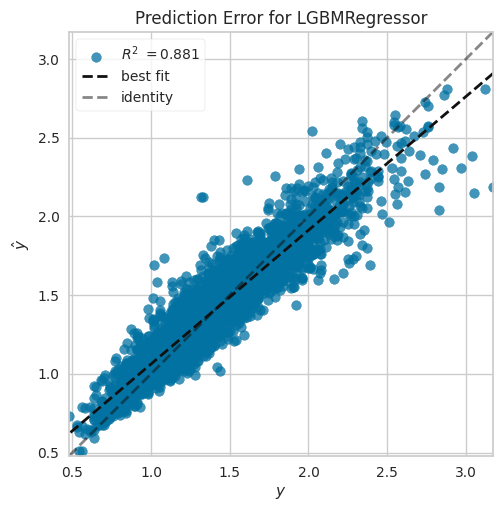

In [46]:
# --- Plot Error Prediction for Light GBM ---
plot_model(lgbm, plot = 'error')

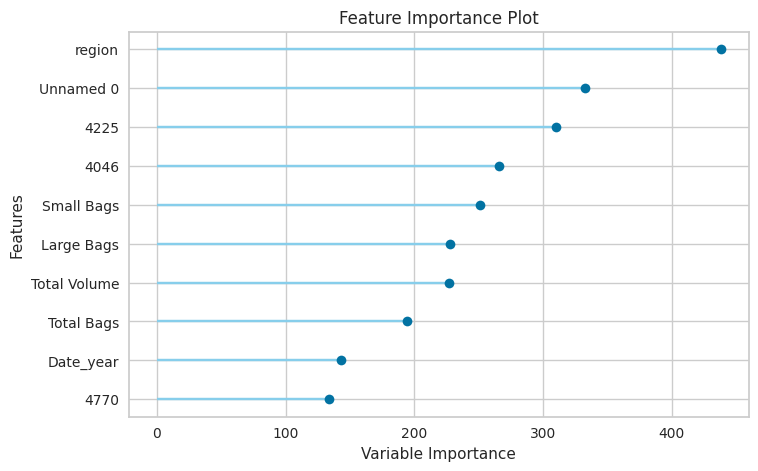

In [47]:
# --- Plot Feature Importance for Light GBM --
plot_model(lgbm, plot = 'feature')

In [48]:
# --- Tuning Light Gradient Boost ---
tune_lgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1149,0.0252,0.1588,0.8495,0.0627,0.0838
1,0.1186,0.0242,0.1555,0.8599,0.0627,0.0871
2,0.1170,0.0242,0.1555,0.8397,0.0643,0.0890
3,0.1107,0.0223,0.1494,0.8643,0.0599,0.0818
4,0.1117,0.0225,0.1500,0.8625,0.0601,0.0826
5,0.1106,0.0218,0.1476,0.8562,0.0604,0.0835
6,0.1181,0.0253,0.1591,0.8420,0.0643,0.0883
7,0.1203,0.0268,0.1637,0.8421,0.0651,0.0878
8,0.1219,0.0256,0.1601,0.8375,0.0648,0.0907


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


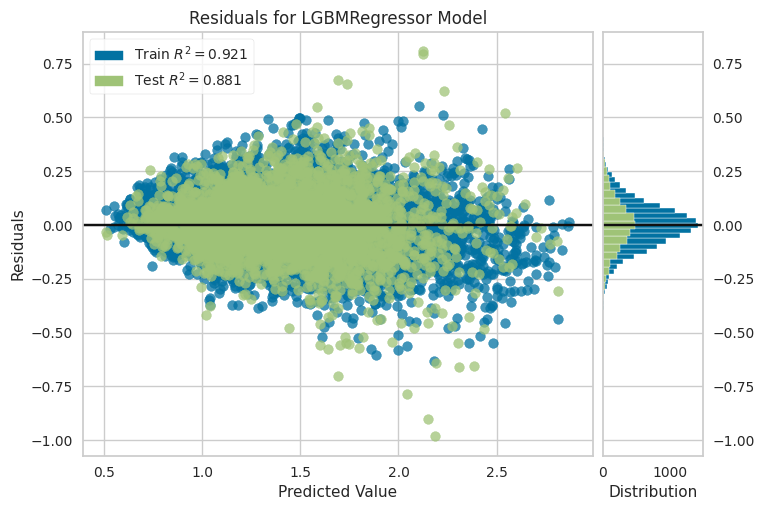

In [49]:
# --- Plot the Residual of Tuned Light Gradient Boost ---
plot_model(tune_lgbm)

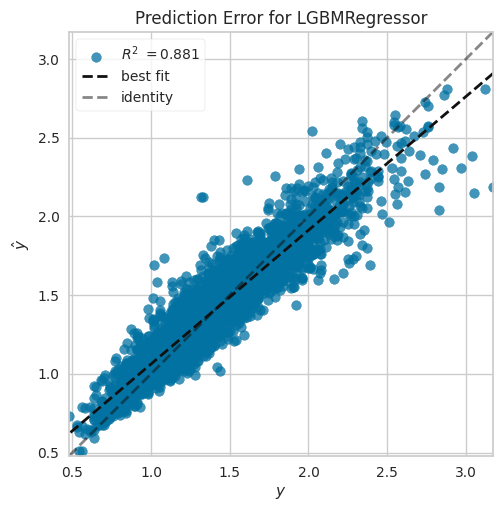

In [50]:
# --- Plot Error Prediction for Tuned Light Gradient Boost ---
plot_model(tune_lgbm, plot = 'error')

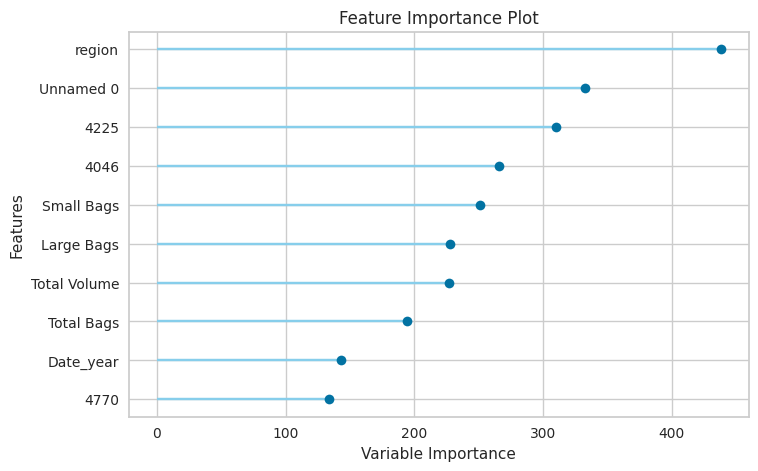

In [51]:
# --- Plot Feature Importance for Tuned Light Gradient Boost --
plot_model(tune_lgbm, plot = 'feature')

In [52]:
# --- Prediction using Best Model ---
predict_model(best_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0734,0.0122,0.1106,0.9244,0.0440,0.0540


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,AveragePrice,prediction_label
5078,34,2016-05-01,8.580374e+05,9.113613e+04,2.710051e+05,11463.750000,484432.531250,458041.093750,25900.730469,490.709991,conventional,2016,Seattle,5,0.82,0.8442
10697,11,2015-10-11,8.749600e+03,6.000000e+00,6.835000e+01,0.000000,8675.250000,8675.250000,0.000000,0.000000,organic,2015,NorthernNewEngland,10,1.61,1.6179
15569,33,2017-05-14,1.437912e+05,3.379520e+03,7.303243e+04,0.000000,67379.257812,29130.710938,38248.550781,0.000000,organic,2017,GreatLakes,5,1.68,1.5701
2001,25,2015-07-05,2.875719e+05,9.488031e+04,1.180226e+05,15212.240234,59456.820312,58905.710938,551.109985,0.000000,conventional,2015,RichmondNorfolk,7,1.01,1.0194
15780,32,2017-05-21,8.759490e+03,7.682000e+01,1.259860e+03,0.000000,7422.810059,2038.260010,5384.549805,0.000000,organic,2017,Indianapolis,5,0.92,1.4351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,51,2016-01-03,4.065584e+06,6.046972e+05,2.200075e+06,543717.875000,717093.500000,438279.968750,147920.687500,130892.796875,conventional,2016,GreatLakes,1,0.92,0.9325
326,14,2015-09-20,4.759791e+06,1.702966e+06,2.230694e+06,273922.375000,552209.750000,529779.375000,17303.910156,5126.490234,conventional,2015,California,9,1.14,1.1133
17177,51,2017-01-08,1.044249e+05,2.621250e+04,6.181320e+03,0.000000,72031.062500,69782.273438,2248.790039,0.000000,organic,2017,SouthCentral,1,1.10,1.0826
13098,21,2016-07-31,1.153139e+05,1.465426e+04,2.827826e+04,1.600000,72379.726562,70166.726562,2213.000000,0.000000,organic,2016,LosAngeles,7,1.21,1.2988


In [53]:
# --- Prediction using RFR Model ---
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0798,0.0137,0.1172,0.9151,0.0466,0.0586


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,AveragePrice,prediction_label
5078,34,2016-05-01,8.580374e+05,9.113613e+04,2.710051e+05,11463.750000,484432.531250,458041.093750,25900.730469,490.709991,conventional,2016,Seattle,5,0.82,0.8497
10697,11,2015-10-11,8.749600e+03,6.000000e+00,6.835000e+01,0.000000,8675.250000,8675.250000,0.000000,0.000000,organic,2015,NorthernNewEngland,10,1.61,1.6042
15569,33,2017-05-14,1.437912e+05,3.379520e+03,7.303243e+04,0.000000,67379.257812,29130.710938,38248.550781,0.000000,organic,2017,GreatLakes,5,1.68,1.5587
2001,25,2015-07-05,2.875719e+05,9.488031e+04,1.180226e+05,15212.240234,59456.820312,58905.710938,551.109985,0.000000,conventional,2015,RichmondNorfolk,7,1.01,1.0627
15780,32,2017-05-21,8.759490e+03,7.682000e+01,1.259860e+03,0.000000,7422.810059,2038.260010,5384.549805,0.000000,organic,2017,Indianapolis,5,0.92,1.2473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,51,2016-01-03,4.065584e+06,6.046972e+05,2.200075e+06,543717.875000,717093.500000,438279.968750,147920.687500,130892.796875,conventional,2016,GreatLakes,1,0.92,0.9434
326,14,2015-09-20,4.759791e+06,1.702966e+06,2.230694e+06,273922.375000,552209.750000,529779.375000,17303.910156,5126.490234,conventional,2015,California,9,1.14,1.0893
17177,51,2017-01-08,1.044249e+05,2.621250e+04,6.181320e+03,0.000000,72031.062500,69782.273438,2248.790039,0.000000,organic,2017,SouthCentral,1,1.10,1.1905
13098,21,2016-07-31,1.153139e+05,1.465426e+04,2.827826e+04,1.600000,72379.726562,70166.726562,2213.000000,0.000000,organic,2016,LosAngeles,7,1.21,1.3179


In [54]:
# --- Prediction using Light Gradient Boosting Model ---
predict_model(lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.1018,0.0192,0.1387,0.8811,0.0552,0.0746


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,AveragePrice,prediction_label
5078,34,2016-05-01,8.580374e+05,9.113613e+04,2.710051e+05,11463.750000,484432.531250,458041.093750,25900.730469,490.709991,conventional,2016,Seattle,5,0.82,0.857325
10697,11,2015-10-11,8.749600e+03,6.000000e+00,6.835000e+01,0.000000,8675.250000,8675.250000,0.000000,0.000000,organic,2015,NorthernNewEngland,10,1.61,1.562000
15569,33,2017-05-14,1.437912e+05,3.379520e+03,7.303243e+04,0.000000,67379.257812,29130.710938,38248.550781,0.000000,organic,2017,GreatLakes,5,1.68,1.477120
2001,25,2015-07-05,2.875719e+05,9.488031e+04,1.180226e+05,15212.240234,59456.820312,58905.710938,551.109985,0.000000,conventional,2015,RichmondNorfolk,7,1.01,1.057732
15780,32,2017-05-21,8.759490e+03,7.682000e+01,1.259860e+03,0.000000,7422.810059,2038.260010,5384.549805,0.000000,organic,2017,Indianapolis,5,0.92,1.232317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,51,2016-01-03,4.065584e+06,6.046972e+05,2.200075e+06,543717.875000,717093.500000,438279.968750,147920.687500,130892.796875,conventional,2016,GreatLakes,1,0.92,0.949554
326,14,2015-09-20,4.759791e+06,1.702966e+06,2.230694e+06,273922.375000,552209.750000,529779.375000,17303.910156,5126.490234,conventional,2015,California,9,1.14,1.059290
17177,51,2017-01-08,1.044249e+05,2.621250e+04,6.181320e+03,0.000000,72031.062500,69782.273438,2248.790039,0.000000,organic,2017,SouthCentral,1,1.10,1.124681
13098,21,2016-07-31,1.153139e+05,1.465426e+04,2.827826e+04,1.600000,72379.726562,70166.726562,2213.000000,0.000000,organic,2016,LosAngeles,7,1.21,1.481890


In [55]:
# --- Finalize Best Model ---
final_best = finalize_model(best_models)

# --- Final Best Model Parameters for Deployment ---
plot_model(best_models, plot='parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


In [56]:
# --- Prediction using Final Model ---
predict_model(final_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.2360,0.1352,0.3677,0.1647,0.1445,0.1401


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,AveragePrice,prediction_label
5078,34,2016-05-01,8.580374e+05,9.113613e+04,2.710051e+05,11463.750000,484432.531250,458041.093750,25900.730469,490.709991,conventional,2016,Seattle,5,0.82,0.8678
10697,11,2015-10-11,8.749600e+03,6.000000e+00,6.835000e+01,0.000000,8675.250000,8675.250000,0.000000,0.000000,organic,2015,NorthernNewEngland,10,1.61,1.1755
15569,33,2017-05-14,1.437912e+05,3.379520e+03,7.303243e+04,0.000000,67379.257812,29130.710938,38248.550781,0.000000,organic,2017,GreatLakes,5,1.68,1.1483
2001,25,2015-07-05,2.875719e+05,9.488031e+04,1.180226e+05,15212.240234,59456.820312,58905.710938,551.109985,0.000000,conventional,2015,RichmondNorfolk,7,1.01,1.0165
15780,32,2017-05-21,8.759490e+03,7.682000e+01,1.259860e+03,0.000000,7422.810059,2038.260010,5384.549805,0.000000,organic,2017,Indianapolis,5,0.92,1.2662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,51,2016-01-03,4.065584e+06,6.046972e+05,2.200075e+06,543717.875000,717093.500000,438279.968750,147920.687500,130892.796875,conventional,2016,GreatLakes,1,0.92,0.9092
326,14,2015-09-20,4.759791e+06,1.702966e+06,2.230694e+06,273922.375000,552209.750000,529779.375000,17303.910156,5126.490234,conventional,2015,California,9,1.14,1.1134
17177,51,2017-01-08,1.044249e+05,2.621250e+04,6.181320e+03,0.000000,72031.062500,69782.273438,2248.790039,0.000000,organic,2017,SouthCentral,1,1.10,0.8160
13098,21,2016-07-31,1.153139e+05,1.465426e+04,2.827826e+04,1.600000,72379.726562,70166.726562,2213.000000,0.000000,organic,2016,LosAngeles,7,1.21,1.1026


In [57]:
# --- Save Final Model into Pickle File ---
save_model(final_best,'Final_Best_Model_caesarmario_06May2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'Total Volume',
                                              '4046', '4225', '4770',
                                              'Total Bags', 'Small Bags',
                                              'Large Bags', 'XLarge Bags'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  Tran...
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['region'],
                                     transformer=TargetEncoder(cols=['region'],
                                                       

In [58]:
# --- Create Light Decision Tree ---
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1123,0.0281,0.1676,0.8322,0.0662,0.0813
1,0.1116,0.0278,0.1668,0.8388,0.0661,0.0804
2,0.1107,0.0296,0.1720,0.8038,0.0677,0.0801
3,0.1131,0.0318,0.1782,0.8069,0.0710,0.0825
4,0.1058,0.0239,0.1544,0.8543,0.0613,0.0759
5,0.1107,0.0280,0.1672,0.8154,0.0669,0.0818
6,0.1130,0.0298,0.1726,0.8142,0.0693,0.0827
7,0.1123,0.0283,0.1683,0.8331,0.0672,0.0815
8,0.1117,0.0272,0.1649,0.8276,0.0668,0.0817


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
# --- Tuning Decision Tree ---
tune_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1235,0.0309,0.1758,0.8153,0.0687,0.0889
1,0.1251,0.0290,0.1704,0.8319,0.0681,0.0908
2,0.1211,0.0290,0.1704,0.8075,0.0688,0.0897
3,0.1215,0.0310,0.1760,0.8117,0.0697,0.0886
4,0.1186,0.0264,0.1625,0.8387,0.0645,0.0861
5,0.1169,0.0268,0.1637,0.8230,0.0661,0.0871
6,0.1208,0.0293,0.1713,0.8169,0.0682,0.0888
7,0.1339,0.0372,0.1928,0.7810,0.0761,0.0969
8,0.1238,0.0283,0.1684,0.8203,0.0681,0.0913


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


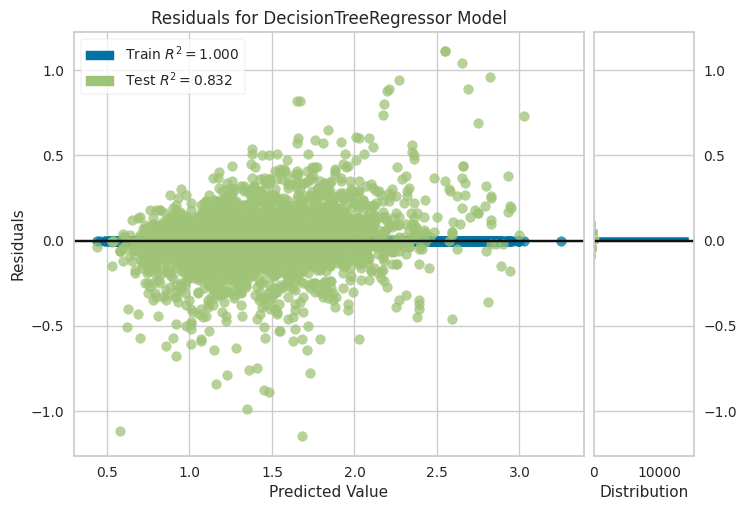

In [60]:
# --- Plot the Residual of Tuned Decision Tree ---
plot_model(tune_dt)

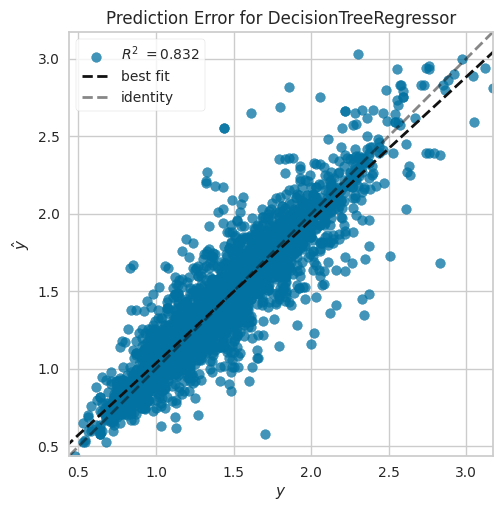

In [61]:
# --- Plot Error Prediction for Tuned Decision Tree ---
plot_model(tune_dt, plot = 'error')

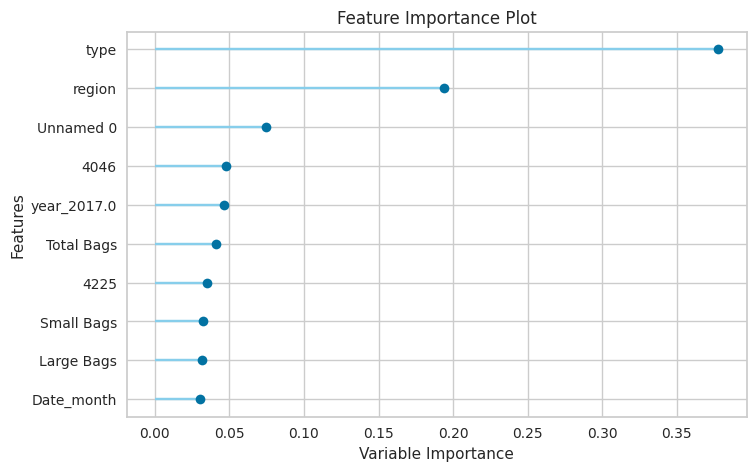

In [62]:
# --- Plot Feature Importance for Tuned Decision Tree --
plot_model(tune_dt, plot = 'feature')